In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import skewnorm
import random
from PIL import Image

### QUESTION 2:

In [2]:
def gen(n):
    matrix=np.zeros((n,n));
    for i in range(0,n):
        for j in range(0,n):
            matrix[i,j]=random.uniform(-1,1)
    return matrix

### QUESTION 3:

In [3]:
def partialpivoting(matrix,i,n): #For column i, move the row with the highest absolute element in i to be the ith row
    maximum=-np.inf
    maxindex=0
    for j in range(i,n):
        if(np.abs(matrix[j,i])>maximum):
            maxindex=j
            maximum=np.abs(matrix[j,i])
    row=matrix[i].copy()
    matrix[i]=matrix[maxindex]
    matrix[maxindex]=row
    return matrix

In [4]:
def gaussianel(matrix,n):
    for i in range(0,n-1):
        partialpivoting(matrix,i,n)
        pivot=matrix[i,i]
        for j in range(i+1,n):
            ratio=-(matrix[j,i])/(matrix[i,i])
            for k in range(i,n):
                matrix[j,k]=matrix[j,k]+ratio*matrix[i,k]
    return matrix

### QUESTION 4:

In [5]:
def growthfactor(matrixA, n):
    max_a=np.amax(np.absolute(matrixA))
    matrixA=gaussianel(matrixA,n)
    max_u=np.amax(np.absolute(matrixA))
    growthfactor=max_u/max_a
    return growthfactor

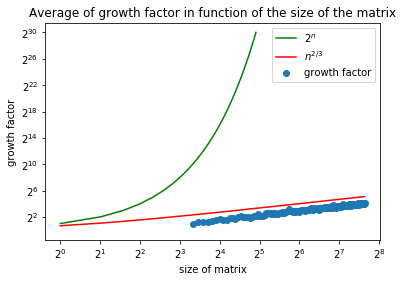

In [35]:
 def growth_vs_size(maxsize,repetitions):
    array=[]
    for i in range(10,maxsize):
        average=0
        for repetition in range(1,repetitions):
            A=gen(i)
            growth=growthfactor(A,i)
            average=average+growth/repetitions
        array=array+[average]
    return array
maxmatrice=200
array=growth_vs_size(maxmatrice,10)
dimension=range(10,maxmatrice)
plt.title('Average of growth factor in function of the size of the matrix')
plt.scatter(dimension, array, label="growth factor")
plt.plot(range(1,maxmatrice),np.power(2,range(1,maxmatrice)),'green',label="$2^n$")
plt.plot(np.power(range(1,maxmatrice),2/3),'red',label="$n^{2/3}$")
plt.legend()
plt.xlabel('size of matrix')
plt.ylabel('growth factor')
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.show()

We see that the growth factor curve has a tendency very close to the $n^{2/3}$ curve.
So we can estimate the power $\alpha$ to be $\alpha = \frac{2}{3}$ in the assumed dependence $g≈cn^α$, where g is the growth factor, n is the matrix size, and c is a constant.
This is much better, as we can see on the graph, than the worst case $g≈2^n$.
My computer is very slow, so I decided to have the maximum matrix of size $200$. Even for $n=200$, it takes $1$ hour...

### QUESTION 5:

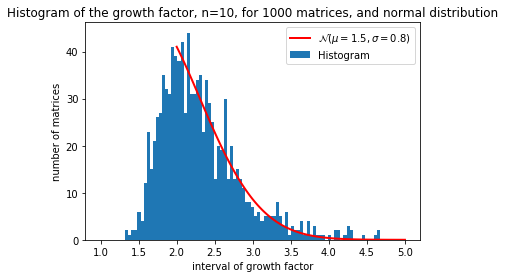

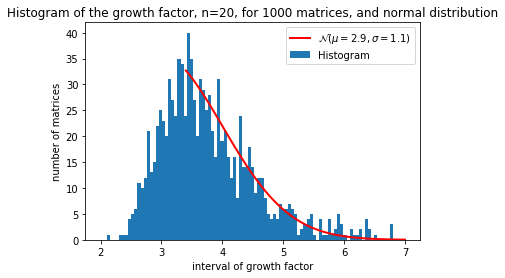

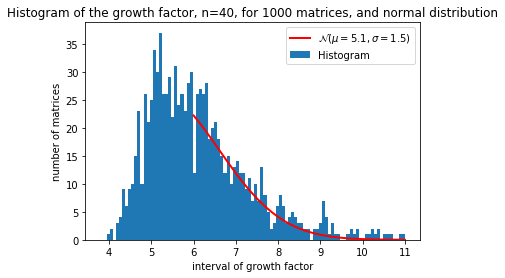

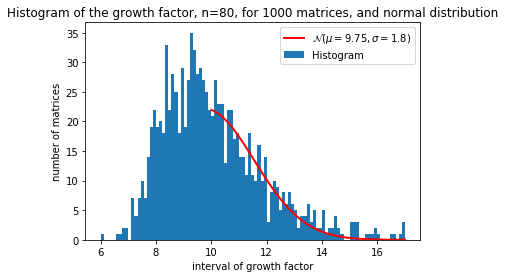

In [16]:
n=10
bins=np.linspace(1,5,100)
plt.hist([growthfactor(gen(n),n) for i in range(1000)],bins, label="Histogram")
plt.title('Histogram of the growth factor, n=10, for 1000 matrices, and normal distribution')
plt.xlabel('interval of growth factor')
plt.ylabel('number of matrices')
sigma=0.8
mu=1.5
x = np.linspace(2, 5, 100)
plt.plot(x,100*mlab.normpdf(x, mu, sigma),'red',linewidth=2,label=r'$\mathcal{N}(\mu = 1.5,\sigma = 0.8)$')
plt.legend()
plt.show()

n=20
bins=np.linspace(2,7,100)
plt.hist([growthfactor(gen(n),n) for i in range(1000)],bins, label="Histogram")
plt.title('Histogram of the growth factor, n=20, for 1000 matrices, and normal distribution')
plt.xlabel('interval of growth factor')
plt.ylabel('number of matrices')
sigma=1.1
mu=2.9
x = np.linspace(3.4, 7, 100)
plt.plot(x,100*mlab.normpdf(x, mu, sigma),'red',linewidth=2,label=r'$\mathcal{N}(\mu = 2.9,\sigma = 1.1)$')
plt.legend()
plt.show()

n=40
bins=np.linspace(3.8,11,100)
plt.hist([growthfactor(gen(n),n) for i in range(1000)],bins, label="Histogram")
plt.title('Histogram of the growth factor, n=40, for 1000 matrices, and normal distribution')
plt.xlabel('interval of growth factor')
plt.ylabel('number of matrices')
sigma=1.5
mu=5.1
x = np.linspace(6, 11, 100)
plt.plot(x,100*mlab.normpdf(x, mu, sigma),'red',linewidth=2,label=r'$\mathcal{N}(\mu = 5.1,\sigma = 1.5)$')
plt.legend()
plt.show()

n=80
bins=np.linspace(6,17,100)
plt.hist([growthfactor(gen(n),n) for i in range(1000)],bins, label="Histogram")
plt.title('Histogram of the growth factor, n=80, for 1000 matrices, and normal distribution')
plt.xlabel('interval of growth factor')
plt.ylabel('number of matrices')
sigma=1.8
mu=9.75
x = np.linspace(10, 17, 100)
plt.plot(x,100*mlab.normpdf(x, mu, sigma),'red',linewidth=2,label=r'$\mathcal{N}(\mu = 9.75,\sigma = 1.8)$')
plt.legend()
plt.show()

In blue, we can see the histograms for different $n$. The distribution seemed to follow a normal distribution $\mathcal{N(\mu, \sigma)}$. So in red is my conjecture on how the pdf decays as the growth factor becomes large. 

Since my conjecture is the pdf of a Gaussian distribution, it follows a $c*e^{\frac{-(x-\mu)^2}{2\sigma ^2}}$ form, with $c=\frac{1}{\sqrt{2*\pi}*\sigma}$ a constant. The parameters $(\mu, \sigma)$ of the pdf vary according to the $n$.

By searching on Internet, I found a parameter of "skewness" for a normal distribution. Here it could be even more precise than the normal distribution we plot, as the blue graphs are asymmetric: more straight on the left of the mean, and more curved on its right.

### QUESTION 6:

I chosed $\mu=0$ and $\sigma=1$ for the random normal distribution of the entries in my matrix generator.

We see that we obtain very similar results as for the random number between $-1$ and $1$ above. 

The approximation about the growth factor curve also has a tendency very close to the $n^{2/3}$ curve, hence we can approximate $\alpha = \frac{2}{3}$ in the assumed dependence $g≈cn^α$.

Also the histograms are very similar, and the decay when the growth factor becomes large can be approximated with globally the same pdf as above (the normal distribution, with parameters changing according to the $n$).

It makes sense to see those $2$ cases very similar, as $\mathcal{N(0,1)}$ represents random number centered at $0$ and where the majority of the values will be between $-1$ and $1$, which is very close to simply random numbers between $-1$ and $1$.

In [17]:
def gen_normal(n):
    matrix=np.zeros((n,n));
    for i in range(0,n):
        for j in range(0,n):
            matrix[i,j]=np.random.normal(0,1)
    return matrix

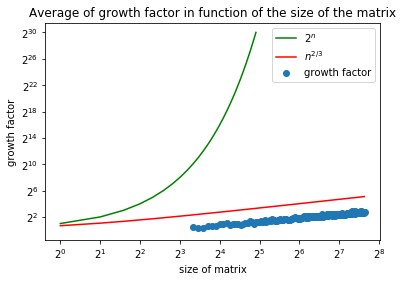

In [57]:
def growth_vs_size(maxsize,repetitions):
    array=[]
    for i in range(10,maxsize):
        average=0
        for repetition in range(1,repetitions):
            A=gen_normal(i)
            growth=growthfactor(A,i)
            average=average+growth/repetitions
        array=array+[average]
    return array
maxmatrice=200
array=growth_vs_size(maxmatrice,10)
dimension=range(10,maxmatrice)
plt.title('Average of growth factor in function of the size of the matrix')
plt.scatter(dimension, array, label="growth factor")
plt.plot(range(1,maxmatrice),np.power(2,range(1,maxmatrice)),'green',label="$2^n$")
plt.plot(np.power(range(1,maxmatrice),2/3),'red',label="$n^{2/3}$")
plt.legend()
plt.xlabel('size of matrix')
plt.ylabel('growth factor')
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.show()

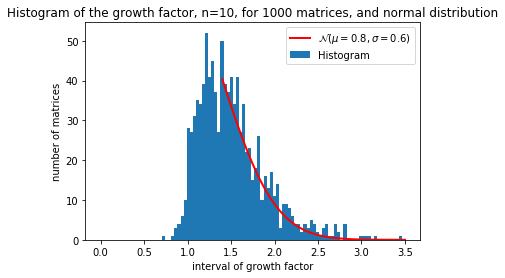

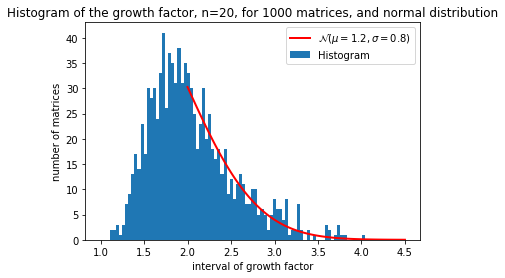

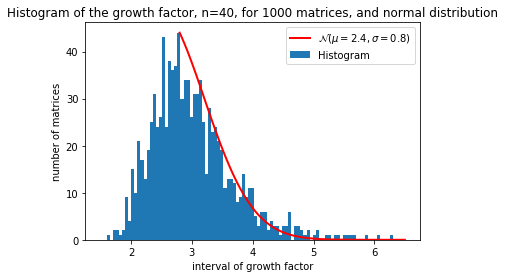

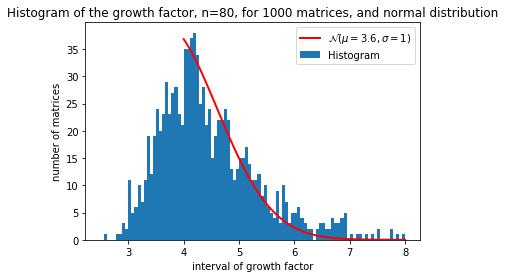

In [56]:
n=10
bins=np.linspace(0,3.5,100)
plt.hist([growthfactor(gen_normal(n),n) for i in range(1000)],bins, label="Histogram")
plt.title('Histogram of the growth factor, n=10, for 1000 matrices, and normal distribution')
plt.xlabel('interval of growth factor')
plt.ylabel('number of matrices')
sigma=0.6
mu=0.8
x = np.linspace(1.4, 3.5, 100)
plt.plot(x,100*mlab.normpdf(x, mu, sigma),'red',linewidth=2,label=r'$\mathcal{N}(\mu = 0.8,\sigma = 0.6)$')
plt.legend()
plt.show()

n=20
bins=np.linspace(1,4.5,100)
plt.hist([growthfactor(gen_normal(n),n) for i in range(1000)],bins, label="Histogram")
plt.title('Histogram of the growth factor, n=20, for 1000 matrices, and normal distribution')
plt.xlabel('interval of growth factor')
plt.ylabel('number of matrices')
sigma=0.8
mu=1.2
x = np.linspace(2, 4.5, 100)
plt.plot(x,100*mlab.normpdf(x, mu, sigma),'red',linewidth=2,label=r'$\mathcal{N}(\mu = 1.2,\sigma = 0.8)$')
plt.legend()
plt.show()

n=40
bins=np.linspace(1.5,6.5,100)
plt.hist([growthfactor(gen_normal(n),n) for i in range(1000)],bins, label="Histogram")
plt.title('Histogram of the growth factor, n=40, for 1000 matrices, and normal distribution')
plt.xlabel('interval of growth factor')
plt.ylabel('number of matrices')
sigma=0.8
mu=2.4
x = np.linspace(2.8, 6.5, 100)
plt.plot(x,100*mlab.normpdf(x, mu, sigma),'red',linewidth=2,label=r'$\mathcal{N}(\mu = 2.4,\sigma = 0.8)$')
plt.legend()
plt.show()

n=80
bins=np.linspace(2.5,8,100)
plt.hist([growthfactor(gen_normal(n),n) for i in range(1000)],bins, label="Histogram")
plt.title('Histogram of the growth factor, n=80, for 1000 matrices, and normal distribution')
plt.xlabel('interval of growth factor')
plt.ylabel('number of matrices')
sigma=1
mu=3.6
x = np.linspace(4, 8, 100)
plt.plot(x,100*mlab.normpdf(x, mu, sigma),'red',linewidth=2,label=r'$\mathcal{N}(\mu = 3.6,\sigma = 1)$')
plt.legend()
plt.show()